# Welcome to the ML-Entry Workshop! 🚀

## What We’ll Cover:
- Introduction
- How does a Data Science project look?
- How do we choose a model and train it?
- Hands-on experience: Building Tinder! Create a dataset, and train a model to solve a real-world problem.
- Theory Keyconcepts: Hypothesis set, Train vs Validation/Test, loss function, Backpropagtion, CNN...
- Take it further: recommended steps if you want to deepen your skills and Knowledge

By the end, you'll understand the **core steps** in building an ML model and how it applies to problems like **finding matches in dating apps**.

---

### Basic preps:
1. Install uv: `brew install uv`
2. clone the workshop repo: `git clone git@github.com:zaichyk/ml-entry-workshop.git`
3. Stop everything and order Lunch to 12:30
4. Go to repo root and run : `uv sync`
5. Activate your venv `source .venv/bin/activate`
6. Create a new ipython kernel `python -m ipykernel install --user --name=mlworkshop --display-name "Python (ML Workshop)"`
7. in the top right corner choose your new kernel "Python (ML Workshop)"
8. cd `ml_entry_workshop` open `workshop_notebook.ipynb`
9. You are good to go.

# 1. Introduction to Machine Learning

### 1.0 About me
*“Hi! I’m Hanan, 36, Father to Ofek, Husband of Inbal,<br>And I like explaining complex things in simple terms* 😊 *”*

## 1.1 Types of Machine Learning  

Machine learning is broadly categorized into three types:  

- **Supervised Learning** – Learning from labeled examples (e.g., spam detection, image classification).  
- **Unsupervised Learning** – Finding patterns in **unlabeled** data (e.g., clustering, anomaly detection).  
- **Reinforcement Learning** – Learning by interacting with an environment (e.g., game-playing agents, robotics).  

Today, we will **focus solely on supervised learning**, the most widely used ML approach in industry.

Whenever we say ML we mean Supervised and vice versa.

---

## 1.2 When Do We Use Machine Learning?

#### 3 simple conditions:
✅ We believe a pattern exists.  
❌ We don’t know how to define it with hardcoded logic.  
✅ We have examples (data) showing expected results (Tests).

**Supervised learning ~ Test driven developement**
Test-Driven Development (TDD) is a software development approach where tests are written before the actual code, guiding implementation and ensuring functionality through iterative cycles of failing tests, coding, and refactoring.

Machine (supervisied) Learning is **like writing tests, and let someone else write the logic, as long as they pass the tests**:

Instead of manually coding logic, we **show examples, an a model "learns" what should be done**—just like refining an implementation until all tests pass.

![Machine Learning Types](data/presentation_files/show_you_the_door.png)

## 1.3 Core Components of an ML Model

### Formal Definition
In machine learning, we aim to approximate an **UNKNOWN** target function:

$$f: X \rightarrow Y$$

Where:
- **X** is the input space (features, vector, images, text,....).
- **Y** is the output space (labels or predictions: {0,1}, [-1,1], {cats,dogs}, {documents_labels}).
- The goal is to learn a function **f** that best maps inputs to outputs.

---

#### 1️⃣ Dataset D (Examples, Test Cases)  
Our training data consists of **labeled examples**:

$$(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$$

- Each **x** is an input (e.g., an image, text, or structured data).
- Each **y** is the correct output (e.g., a category label).
- The dataset is our sole source of information about the unknown target function
- We assume the examples are *independent and identically distributed* (i.i.d) — we state this for correctness won't elaborate further.
* Coming back to the TDD analogy, the dataset serves as a set of test cases that guide the learning process.

**Good question at this point:**

Is the model deterministic?
	•	Yes, ML models are deterministic → For the same input X, you get the same output Y.
	•	But what about ChatGPT? It doesn’t always generate the same response.

Explanation:
	•	It depends on how you define the ML model vs. post-processing.
	•	LLMs vs. Classification Models
	•	Classification models (e.g., fraud detection) directly map X to Y, producing deterministic results.
	•	LLMs are generative: They include a probability mechanism for text generation.
	•	Core model of an LLM is deterministic:
	•	Input X (text) → Output Y (logits, a probability distribution over words).
	•	For the same X, you get the same distribution vector.
	•	Randomness comes from the decoding process (e.g., sampling, temperature settings), which chooses words from the distribution.

---
#### 2️⃣ Hypothesis Class (Possible Implementations H)  
- The **hypothesis class** defines the set of functions the model can learn.
- This helps focus our algorithm.
- In theory it doesn't even limit the model, as we can set $H=\{set\ of\ all\ functions\}$
- In practice We never mention a Hypothesis set, but every model you know rely on this definition.
- In theory this doesn't even limit the model, as we can set $H=\{set\ of\ all\ functions\}$
- In practice We never mention a Hypothesis set, but every model you know rely on this definition in it's training/optimisation phase.
---

#### 3️⃣ Learning Algorithm A (Process of Finding f)  
- The **learning algorithm** _searches for the best_ function **h ∈ H**, where **H** is the **hypothesis set**.
- _searches for the best_ = **optimizes parameters** to minimize errors. This Process is also called **expectancy loss minimazation**.
  $$ 
\min_{h \in H} \sum_{i=1}^{N} L(h(x_i), y_i)
$$
- Think of this as an **automated debugging and optimization** process—like refining an implementation until all test cases pass.

---

<div style="text-align: center;">
  <img src="data/presentation_files/learning_paradigm.png" alt="ML Components" width="600" height="400">
</div>

- **Examples:**
    - **Linear Regression**:
        - \( H \) = Set of linear functions of the form \( h(x) = a \cdot x + b \).
        - \( L \) = Learn the best **\( a \)** and **\( b \)** that explain the dataset.

    - **Decision Trees**:
        - \( H \) = Set of **tree-structured functions**, where each node represents a feature split.
            - Example: Deciding whether to go outside based on weather conditions (**Sunny, Humid, Temperature**).
            - Data: Past experience compared to historical weather.
        - \( L \) = Learn the best splits for **Sunny, Humid, Temperature**.

    - **Neural Networks**:
        - \( H \) = A structured set of **parameters (weights)** and **mathematical operations** in a predefined order (architecture).
        - \( L \) = Learn the weights that best fit the data, typically using some form of **SGD** (more on that later).

## 1.4 Data is Essential, Model Choice is Secondary
We defined three key components in the learning paradigm: Data, Hypothesis Set, and Learning Algorithm.
Among these, data is the most crucial starting point—without high-quality, representative data, even the best hypothesis class and learning algorithm will fail.

**Why is data so important?**
- The dataset is our only information about the unknown target function  f .
- **Garbage in, garbage out**:
    - Poor or biased data leads to poor generalization, regardless of model complexity.
    - Lack of data is leading to overfitting
- A simple model trained on high-quality data often outperforms a complex model trained on noisy or unrepresentative data.

**Creating high Quality dataset is hard**
- The dataset contains all the infromation we don't know to formalize.
- It takes time to find the right examples.
- It takes time or money to tag.
- It is usually boring.
- It sometimes takes time to understand what examples I need to show the model.
- By creating a good dataset you actually understand the problem better and better.


**⚠ The Most Important Takeaway of This Entire Workshop ⚠**

- The first focus in any ML project must be collecting, cleaning, and understanding the data before refining models.
- No model can fix bad or missing data. This is supported both in theory and in practice
- Most effective way to improve a model - find the bad examples in the dataset

# 2. A Data Science Project - Our own Tinder

### Key Questions to Ask In Every Project:  
🔹 What are we trying to solve?  
🔹 Is ML a good solution for this?  
🔹 What data do we have (or need to collect)?  

Our goal is not to **force ML** but to **determine whether ML is the right approach**.

**Negative examples: When ML is not the way to go**

1. **Identifying Country Names in a Text**
    - Tempting ML Approach: Use an NLP model to detect mentions of countries in text.
    - Better Alternative: A simple lookup table or regular expressions with 195 country names:
        - Can achieve 99% accuracy without ML.
        - Faster and simpler both in development and in running time
    - ML would introduce unnecessary complexity.
    - ML is a good option if you detect 20 categories at a time, and one of them is country name.<br>
<br>
2. **Categorizing Financial Documents**
    - Forms like W-2, 1040, often begin with a fixed phrase or code that can easily be matched with a **regex** (e.g., “Form W-2 Wage and Tax Statement”).
    - ML adds unnecessary overhead (e.g., collecting labeled training data, handling OCR variations).
    - ML is the way to go if you want to categorize dozens of categories

### Build your own Tinder

We want to build a model that **learns what you find attractive**.  

#### Why is this a Good ML Problem?  
✅ **There is a pattern** – Your preferences are not random.  
❌ **It’s hard to code manually** – You can’t write explicit rules for what makes someone attractive.  
✅ **It’s easy to show with examples** – Instead of defining a rule, you can **label examples** of what you like.  

This makes it a **classic supervised learning problem**:  
- **Inputs ($X$)**: Images of people.  
- **Outputs ($Y$)**: Your rating (Like/Dislike).  
- **Goal**: Learn a function $f: X \to Y$ that predicts your taste.

To build our model, we must:  

### 1️⃣ **Create a Dataset**  
Choosing data can come from two directions:  
1. **Use existing data** – Work with what you already have.  
   - Extract relevant features from it.  
2. **Generate new data** – Collect data based on your understanding of the problem.  

---

### 2️⃣ **Choose a Hypothesis Class**  
The hypothesis class defines the set of functions the model can learn. Common choices include:  

- **Decision Trees** – Learn a series of if-else rules to classify inputs. Needs well defined features (e.g. height, weight, skin_color, eye_color, hair_type, ...)
- **Linear Regression** – Model relationships between features using a weighted sum.  Needs well defined numeric, *continoues, features.
- **Convolutional Neural Networks (CNNs)** – Extract spatial patterns from images, making them ideal for vision tasks.  

---

### 3️⃣ **Our Case: Images + CNN**  
In our case, we will use **images** because:  
- They are the most natural way to represent visual preferences.  
- They allow us to capture complex patterns that are hard to define manually.  

Since CNNs excel at **image-based learning**, we will use a **Convolutional Neural Network (CNN)** to model preferences.  

---

### 4️⃣ **Select a Learning Algorithm**  
Once we choose a hypothesis class, we need an algorithm to **train** the model.  

- In **99.999...% of cases**, the model you work with has a **built-in learning algorithm**.  
- For **Neural Networks**, the standard training method is **Backpropagation**.  

(*We will dive a little bit in on how **Backpropagation** works in the training section.*)

### 5️⃣ **Evaluate results**
improve this bullet


Create a detailed explanation.

# 3. Creating Our Dataset - The most important part of them all. Allways. 

**Reminder: Why Does Data Matter?**
Before training a model, we need **high-quality data**.  

🔹 **You Can’t Optimize Without Data** – In ML, we have **three main components**:  
   - **Data** – The foundation; without it, learning is impossible.  
   - **Hypothesis Class** – The set of possible functions the model can learn.  
   - **Learning Algorithm** – The method to optimize parameters.  

If we **remove the learning algorithm**, we can still train a model manually.  
If we **choose a suboptimal hypothesis class**, we still learn something.  
But **without data, nothing works.**  

🔹 **Garbage In, Garbage Out** – A model is only as good as the data it learns from.  

---

## 1.3.1 Create Personal Preference Data  
To train our model, we need labeled examples of **what we find attractive**.  

We will use the **Photo-Rater App** to label images, creating a dataset that reflects individual preferences.  

🔜 Next: Let's start label data!  

![Tagg it all](data/presentation_files/xally.jpg)

Instructions:
1. Navigate to `ml_entry_workshop/photo_rater`
2. Run the awesome app:`uv run photo-rater.py`
3. Select your preference: **'Men'** or **'Women'**
4. Start swiping-Just like Tinder:
    - Right arrow for "Like" (or click "Like")
    - Left arrow for "Dislke" (or click "Dislike")
5. If you feel you had enough before you saw all images - just click 'Finish'
6. You will be passed to a summary page where you can go over you selection and change your choices.
7. Click save results, approve.
8. That's it!

Go now... swipe right and left, and come back when you're done.

# 4. Train a model

## 4.1 Prepare Our Dataset for Training  


Now that we have labeled data, we need to **organize it for training**.  

### 1️⃣ Train, Validation, and Test Split  
To evaluate our model properly, we split the data into three parts:  

- **Training Set** – Used to train the model.  
- **Validation Set** – Used to tune hyperparameters and detect overfitting.  
- **Test Set** – Used to evaluate final model performance on unseen data.  

Finally - some code:

In [1]:
import os
import shutil
import random
from pathlib import Path

# Define dataset paths
DATASET_DIR = "data/dataset"  # Base dataset directory
OUTPUT_DIR = "data/dataset_split"  # Where train/val/test splits will be stored

# Define train, validation, and test split ratios
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Set a fixed seed for reproducibility
random.seed(42)

# Ensure the output directories exist
for split in ["train", "val", "test"]:
    for label in ["Like", "Dislike"]:  # Ensure we maintain class labels
        os.makedirs(os.path.join(OUTPUT_DIR, split, label), exist_ok=True)

# Function to split and copy images while maintaining original dataset
def split_and_copy(label):
    label_dir = Path(DATASET_DIR) / label
    all_images = list(label_dir.glob("*.jpg"))  # Adjust for different image formats if needed
    random.shuffle(all_images)  # Shuffle with fixed seed for reproducibility

    # Compute split sizes
    num_images = len(all_images)
    train_split = int(num_images * TRAIN_RATIO)
    val_split = int(num_images * (TRAIN_RATIO + VAL_RATIO))

    # Split dataset
    train_files = all_images[:train_split]
    val_files = all_images[train_split:val_split]
    test_files = all_images[val_split:]

    # Function to copy files instead of moving
    def copy_files(files, split):
        dest_dir = Path(OUTPUT_DIR) / split / label
        existing_files = set(f.name for f in dest_dir.glob("*.jpg"))  # Track existing files
        for file in files:
            if file.name not in existing_files:  # Avoid duplicates if rerunning
                shutil.copy(str(file), os.path.join(dest_dir, file.name))

    # Copy files to respective folders
    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    return len(train_files), len(val_files), len(test_files)

# Process both classes
train_like, val_like, test_like = split_and_copy("Like")
train_dislike, val_dislike, test_dislike = split_and_copy("Dislike")

# Print summary
print(f"Dataset split complete! 🎉")
print(f"Train: {train_like + train_dislike} (Like: {train_like}, Dislike: {train_dislike})")
print(f"Validation: {val_like + val_dislike} (Like: {val_like}, Dislike: {val_dislike})")
print(f"Test: {test_like + test_dislike} (Like: {test_like}, Dislike: {test_dislike})")

Dataset split complete! 🎉
Train: 398 (Like: 28, Dislike: 370)
Validation: 85 (Like: 6, Dislike: 79)
Test: 86 (Like: 6, Dislike: 80)


In [2]:
# Sanity check: Count files in each split
def count_files():
    for split in ["train", "val", "test"]:
        for label in ["Like", "Dislike"]:
            path = Path(OUTPUT_DIR) / split / label
            num_files = len(list(path.glob("*.jpg")))
            print(f"{split.capitalize()} - {label}: {num_files} images")

count_files()

Train - Like: 28 images
Train - Dislike: 370 images
Val - Like: 6 images
Val - Dislike: 79 images
Test - Like: 6 images
Test - Dislike: 80 images


### 4.1.1 Why are we doing this?  

### 4.1.2 Overfitting vs. Generalization – A TDD Analogy

🚀 Imagine You’re an Engineer...
I give you **100 test cases** and tell you:

👉 **"Just make sure all these tests pass."**

A straighforward solution would be:
look at each *test_i* that has *input_i* and *expected_output_i*
```python
 def my_function(some_input):
     if some_input==input_i:  
         return expected_output_i  
     else:  
         return None  
```
This **hardcodes answers** instead of solving the real problem.  
✅ **Passes all known tests.**  
❌ **Fails on new cases.**  
**This is overfitting!** In extreme cases, it's just **memorization**.  

---

##### **How Do We Ensure Generalization?**
Because I'm smart, I **don't give you all 100 test cases**!  
👉 **I give you 80**, but keep **20 hidden.**  

I tell you:  
**"Write a good function based on these 80 examples.  
If it also works on my secret 20 tests, I’ll give you 500 shekels in BuyMe!"**  

##### **Two advantages for this approch?**
✅ **Now you must generalize!**  You can't just memorize, you have to find the real pattern!  
✅ **I can test your generalization** Because I kep 20 examples to myself.
 
This is **exactly why we split our dataset** into:  
- **Train Set (80%)** → The model learns from this.  
- **Test Set (20%)** → The model must perform well on unseen data.  

---

##### **Key Takeaway:**  
💡 A model that **only memorizes the training set is useless**. We need **generalization** for real-world performance!  

---

### 4.1.3 Good Questions at This Point 🤔


1️⃣ **How do we evaluate this performance?**  
📢 We will talk about it in the **Evaluation section** (after training).  

2️⃣ **This explanation doesn't explain how the model knows not to overfit the 80 examples I gave him.**  
That is very true! **Splitting the data only allows us to measure generalization performance.**  
Just like we gave the engineer a **500 shekels motivation**, we need ways to **motivate the model not to overfit**.  

This is where **Regularization** comes in! Regularization techniques **penalize complexity** to encourage the model to find simpler, more generalizable patterns. This is advanced so we might just mention this during the follwoing training session! 🚀


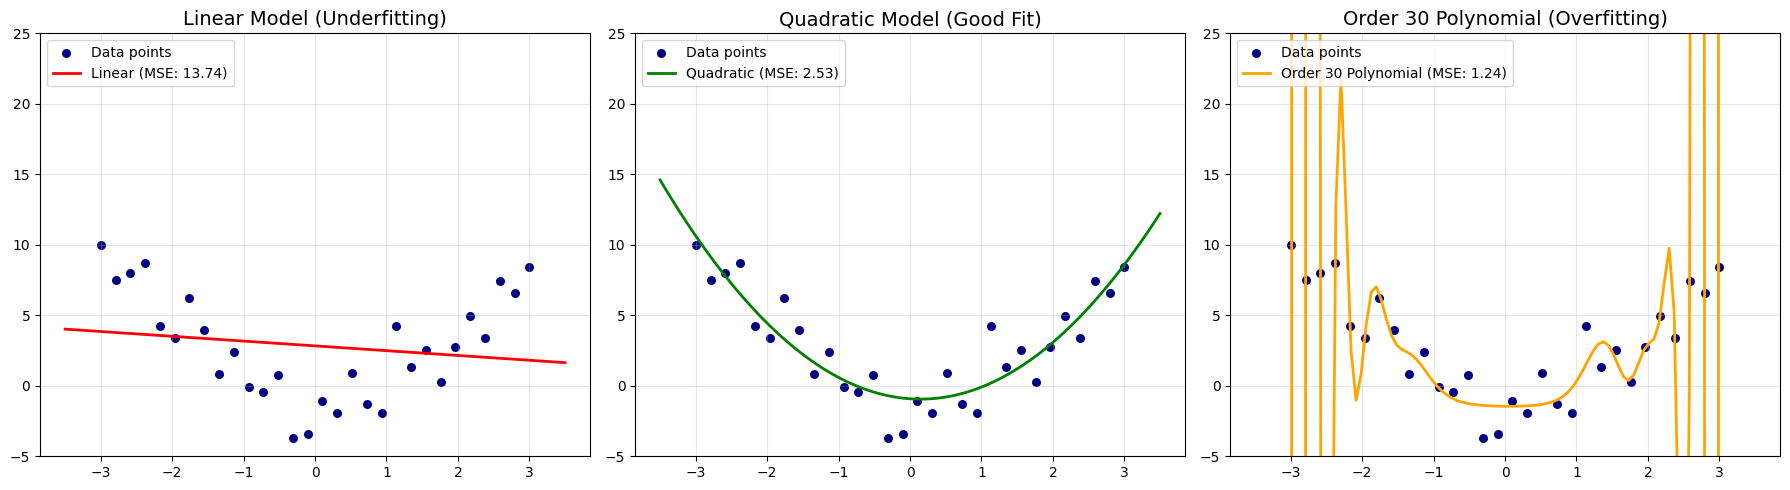

Observations:
1. The linear model (order 1) is too simple and underfits the data.
2. The quadratic model (order 2) nicely captures the underlying pattern.
3. The high-order polynomial (order 30) overfits by catching every data point perfectly.

Without regularization, the complex model tries to pass through every single point,
creating wild fluctuations between data points. This is a classic sign of overfitting.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a quadratic pattern
n_samples = 30  # Using 30 points for clarity
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y_true = X**2  # True function is quadratic (order 2)
noise = np.random.normal(0, 1, size=n_samples) * 2
y = y_true.ravel() + noise  # Add noise to make it realistic

# Create models with different complexities
# 1. Linear model (order 1)
model_linear = make_pipeline(PolynomialFeatures(1), LinearRegression())
# 2. Quadratic model (order 2) - should be a good fit
model_quadratic = make_pipeline(PolynomialFeatures(2), LinearRegression())
# 3. High-order polynomial (order 30) - will perfectly overfit
model_complex = make_pipeline(PolynomialFeatures(30), LinearRegression())

# Fit models
model_linear.fit(X, y)
model_quadratic.fit(X, y)
model_complex.fit(X, y)

# Create a smooth line for predictions
X_test = np.linspace(-3.5, 3.5, 100).reshape(-1, 1)
y_linear = model_linear.predict(X_test)
y_quadratic = model_quadratic.predict(X_test)
y_complex = model_complex.predict(X_test)

# Calculate training error for each model
err_linear = np.mean((model_linear.predict(X) - y)**2)
err_quadratic = np.mean((model_quadratic.predict(X) - y)**2)
err_complex = np.mean((model_complex.predict(X) - y)**2)

# Plot the results - 3 separate subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First plot: Linear model
axes[0].scatter(X, y, color='navy', s=30, label='Data points')
axes[0].plot(X_test, y_linear, color='red', linewidth=2, label=f'Linear (MSE: {err_linear:.2f})')
axes[0].set_title('Linear Model (Underfitting)', fontsize=14)
axes[0].legend(loc='upper left')
axes[0].set_ylim(-5, 25)
axes[0].grid(alpha=0.3)

# Second plot: Quadratic model (good fit)
axes[1].scatter(X, y, color='navy', s=30, label='Data points')
axes[1].plot(X_test, y_quadratic, color='green', linewidth=2, label=f'Quadratic (MSE: {err_quadratic:.2f})')
axes[1].set_title('Quadratic Model (Good Fit)', fontsize=14)
axes[1].legend(loc='upper left')
axes[1].set_ylim(-5, 25)
axes[1].grid(alpha=0.3)

# Third plot: Complex model (perfect overfitting)
axes[2].scatter(X, y, color='navy', s=30, label='Data points')
axes[2].plot(X_test, y_complex, color='orange', linewidth=2, label=f'Order 30 Polynomial (MSE: {err_complex:.2f})')
axes[2].set_title('Order 30 Polynomial (Overfitting)', fontsize=14)
axes[2].legend(loc='upper left')
axes[2].set_ylim(-5, 25)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("1. The linear model (order 1) is too simple and underfits the data.")
print("2. The quadratic model (order 2) nicely captures the underlying pattern.")
print("3. The high-order polynomial (order 30) overfits by catching every data point perfectly.")
print("\nWithout regularization, the complex model tries to pass through every single point,")
print("creating wild fluctuations between data points. This is a classic sign of overfitting.")

### Regularization: Teaching Models to Keep It Simple

The above example demonstrates the concept of regularization in machine learning. We generated data with a quadratic pattern (y = x²) plus noise and fit models of different complexity:

1. **Linear Model (Underfitting)**: Too simple to capture the quadratic nature of the data.
2. **Quadratic Model (Good Fit)**: Correctly captures the underlying pattern without overfitting.
3. **High-Order Polynomial (Overfitting)**: Creates an unstable function by trying to fit every data point perfectly.
4. **Regularized High-Order Polynomial**: Still has high complexity but produces a smoother curve by penalizing extreme coefficient values.

**So what exactly is regularization?**

Regularization works by adding a penalty term to the loss function that increases with model complexity:

$$L_{regularized}(model) = Error(model, data) + \lambda \times Complexity(model)$$

Where:
- $Error(model, data)$ measures how well the model fits the training data
- $Complexity(model)$ measures how complex the model is (often using the size of parameters)
- $\lambda$ (lambda) controls the strength of regularization

By including this penalty, we tell the model: "It's not just about fitting the training data perfectly; you should also keep yourself as simple as possible."

Common regularization techniques include:
- **L1 Regularization (Lasso)**: Penalizes the sum of absolute values of weights, often producing sparse models
- **L2 Regularization (Ridge)**: Penalizes the sum of squared weights, generally shrinking all weights
- **Dropout**: Randomly turns off neurons during training to prevent co-adaptation
- **Early Stopping**: Stops training before the model starts overfitting

Using regularization is like telling a student: "It's not just about memorizing the exact answers to homework problems; you need to understand the underlying patterns so you can solve new problems on the test."

### 4.1.4 A Few words on Preprocessing Before Training

In real-world cases, we usually preprocess the data further before passing it to a model. **Preprocessing** can involve:  

🔹 **Feature Extraction** - Creating additional features from raw data. While this is **less common in images** due to the nature of CNNs, it is **very useful in other models**.
* Example (House Prices) → Instead of using the raw address, we can preprocess it into “distance from the city center”, turning an informative but hard-to-use string into a continuous, easy-to-work-with number.
* Example (NLP) → Before using text in a model, we must convert words into numbers, and better to meaningful numerical vectors (a.k.a. embeddings) to capture their relationships and meanings.
  
🔹 **Data Manipulation** – Standardizing input formats (e.g., resizing images, filtering out low-resolution images, handling missing values).  
🔹 **Normalization & Scaling** – Ensuring that numerical features are on a similar scale to improve training stability.  

##### 🚀 Why Is Preprocessing Crucial?  
Preprocessing is usually where a Data Scientist has the most **room to shine**! Unlike modeling, where architectures and optimizers are often well-defined, **there is no single "correct" way to preprocess data**.  
**_"It is art"_** as some Feinshmekers would say  


## 4.2 (Really) Train

**Step 1: Set Up & Choose the Best Device:**


Training neural networks is heavy lifting—so we want to use a GPU if we can. This line lets PyTorch automatically pick the best hardware on your machine.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# Automatically select the best available device:
# MPS (Apple Silicon), CUDA (NVIDIA GPU), or CPU fallback
device = torch.device("mps" if torch.backends.mps.is_available()
                      else "cuda" if torch.cuda.is_available()
                      else "cpu")
print(f"Using device: {device}")

Using device: mps


**Step 2: Image Preprocessing (Transformations)**

Most pretrained models expect inputs to be a specific size and range. This transformation resizes the photo, turns it into numbers, and scales it to the distribution used in ImageNet.

In [5]:
# Define the image transformations to apply
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to MobileNet input size
    transforms.ToTensor(),          # Convert to PyTorch tensor
    transforms.Normalize(           # Standard ImageNet normalization
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])
])

**📦 Step 3: Load Our Dataset and Create DataLoaders**

We use PyTorch’s ImageFolder to read labeled folders automatically. DataLoader helps us feed images into the model in mini-batches. Note: we shuffle the training set, but not the validation set.”

In [6]:
# Paths to your prepared dataset folders
train_dir = f"{OUTPUT_DIR}/train"
val_dir = f"{OUTPUT_DIR}/val"
test_dir = f"{OUTPUT_DIR}/test"

# Load image folders with the defined transforms
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)

# Wrap datasets with DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Print dataset sizes for sanity check
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

Train samples: 398
Validation samples: 85


**🧠 Step 4: Load and Adapt a Pretrained Model**

We start with a pretrained MobileNetV2—a lightweight CNN originally trained on ImageNet.
Then, we replace its final layer to output just two scores:
Like (1) or Dislike (0).
This lets the model learn to reflect your photo preferences.

In [7]:
# draw here the architecture of 224*224 in 2 out
from torchsummary import summary

# Load pretrained MobileNet model
model = models.mobilenet_v2()

# Modify the classifier for our binary classification task (Like vs. Dislike)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 2)  # Two output classes (Like & Dislike)
)

# Temporarily move to CPU for summary
model_cpu = model.to("cpu")
summary(model_cpu, input_size=(3, 224, 224))

# Send it back to the actual device (MPS, CUDA, etc.)
model = model.to(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

**📉 Step 5: Assign a Loss Function**

Since our goal is to teach the model what’s “wrong”, we use a loss function.

We’ll use Cross-Entropy Loss, ideal for binary classification like Like vs. Dislike:

$$
L = - \sum w_i y_i \log(\hat{y_i})
$$

* ✅ Rewards the model for assigning high probability to the correct class
* ✅ Penalizes confident wrong guesses more than uncertain ones

To handle class imbalance, we assign higher weight to the Like class, so it isn’t ignored just because it’s rare.
* 🔄 You can adjust this: 
* High values (15–20): 📈 Prioritize recall (find more potential matches)
* Mid values (5–8): ⚖️ Balance precision and recall
* 1.0: Treat both classes equally


In [8]:
# Set the weight parameter to balance class importance
# Higher value for the "Like" class (index 1) means the model will be penalized more for misclassifying "Likes"
# A good starting point is the inverse of class frequencies
dislike_weight = 1.0
like_weight = 1.0  # Makes misclassifying "Likes" 10x more costly than "Dislikes"
class_weights = torch.tensor([1.0, like_weight], device=device)

# Define loss function with weights
criterion = nn.CrossEntropyLoss(weight=class_weights)


**🛠️ Step 6: Train the Model**

Time to put everything together and train our model!
* We’ll use the Adam optimizer, a modern variant of Gradient Descent
* The learning rate (0.001) is a standard starting point in many applications
* Each epoch includes:
* A training phase – update weights on labeled data
* A validation phase – check performance on unseen examples

We’ll also track loss on both sets to visualize learning progress and catch signs of overfitting.

In [9]:
# Define the optimizer to be Adam (advance GD) with a learning rate of 0.001 
# lr=0.001 is a common practice in the industry.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss values for plotting
train_losses = []
val_losses = []

# Training loop
num_epochs = 20  # Keep training short for the workshop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_train_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item()
    
    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    
    with torch.no_grad():  # No need to track gradients for validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
    
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

print("Training complete! 🎉")

Epoch [1/20], Train Loss: 0.4089, Val Loss: 0.3438
Epoch [2/20], Train Loss: 0.2707, Val Loss: 0.3599
Epoch [3/20], Train Loss: 0.2956, Val Loss: 0.3505
Epoch [4/20], Train Loss: 0.2235, Val Loss: 0.4616
Epoch [5/20], Train Loss: 0.1728, Val Loss: 0.8143
Epoch [6/20], Train Loss: 0.1371, Val Loss: 0.3064
Epoch [7/20], Train Loss: 0.1338, Val Loss: 0.4307
Epoch [8/20], Train Loss: 0.1312, Val Loss: 0.9276
Epoch [9/20], Train Loss: 0.1445, Val Loss: 0.6511
Epoch [10/20], Train Loss: 0.1579, Val Loss: 0.4104
Epoch [11/20], Train Loss: 0.1214, Val Loss: 0.4467
Epoch [12/20], Train Loss: 0.0623, Val Loss: 0.4261
Epoch [13/20], Train Loss: 0.0259, Val Loss: 0.5312
Epoch [14/20], Train Loss: 0.0477, Val Loss: 0.5797
Epoch [15/20], Train Loss: 0.0285, Val Loss: 0.4918
Epoch [16/20], Train Loss: 0.0337, Val Loss: 0.5297
Epoch [17/20], Train Loss: 0.0275, Val Loss: 0.5603
Epoch [18/20], Train Loss: 0.0178, Val Loss: 0.5319
Epoch [19/20], Train Loss: 0.0370, Val Loss: 0.4765
Epoch [20/20], Train 

### Theory Brake! while training our network, let's head to "What is Neural Network.ipynb" and learn what is a Neural Network and how does it "Learn"

**📈 Step 7: Visualize the Learning Curve**

Let’s plot the training and validation loss over time.
This helps us see if the model is improving, and spot signs of overfitting or underfitting.

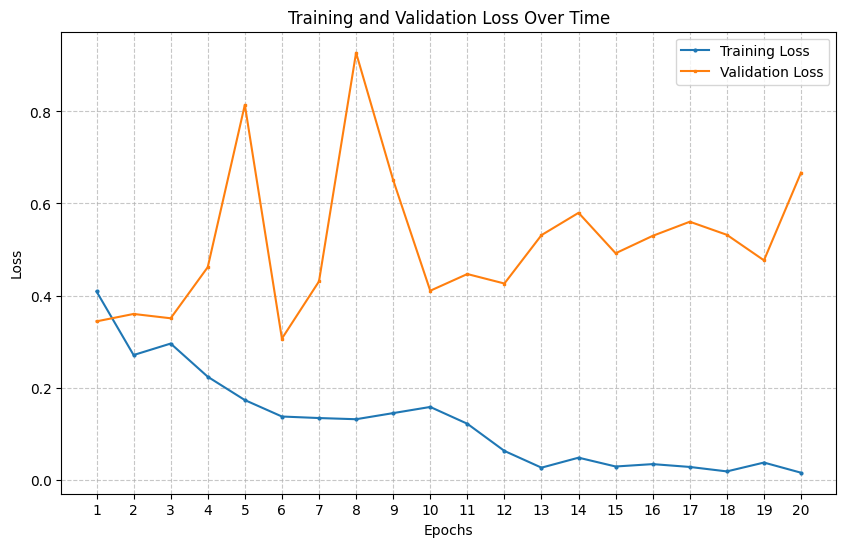

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o', linestyle='-', markersize=2)
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='s', linestyle='-', markersize=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, num_epochs+1, 1))  # Set x-axis ticks to integers from 1 to num_epochs
plt.show()

**❗ Uh-oh… Our Model Is Overfitting!**

That might sound bad — but it’s actually expected given our setup:
* 🧮 Small dataset – Only ~500 images total
* ⚖️ Imbalanced labels – Probably 10 “Dislikes” for every “Like”
* 🤔 Problem complexity – “Taste” is slippery and subjective, not easy to define

You’re not expected to fully understand all of these challenges yet.
After we cover evaluation, we’ll look at practical ways to improve performance.

⸻

🔍 First and most important fix:
**Go over your “Liked” folder and make sure your labels truly reflect your preferences!**


# 5. Test and Evaluation

## 5.0 Prediction Types
Every prediction falls into one of four boxes. Knowing where your model succeeds or fails helps you decide what to improve.

Before diving into metrics, let's understand the four possible outcomes in a (binary) classification:

```
                 │ Predicted "Like" │ Predicted "Dislike"
─────────────────┼──────────────────┼───────────────────
Actual "Like"    │       TP         │        FN
─────────────────┼──────────────────┼───────────────────
Actual "Dislike" │       FP         │        TN
```

🔹 **True Positive (TP)** – The model predicted "Like" and the actual label is "Like".
   - Real-world: You find a person attractive, and the model correctly predicts this.
   - Real-world: In a spam filter, correctly identifying an actual spam email as spam.

🔹 **True Negative (TN)** – The model predicted "Dislike" and the actual label is "Dislike".
   - Real-world: You don't find a person attractive, and the model correctly predicts this.
   - Real-world: In a medical test, correctly identifying a healthy patient as not having the disease.

🔹 **False Positive (FP)** – You don’t like the person, but the model thought you would.
   - Real-world: You don't find a person attractive, but the model incorrectly predicts you would.
   - Real-world: In fraud detection, flagging a legitimate transaction as fraudulent.
   - Also known as a "Type I error" in statistics.

🔹 **False Negative (FN)** – You *do* like the person, but the model didn’t think so.
   - Real-world: You find a person attractive, but the model incorrectly predicts you wouldn't.
   - Real-world: In a cancer screening, failing to detect a malignant tumor.
   - Also known as a "Type II error" in statistics.

These four outcomes are the building blocks for all the metrics we'll discuss next, and they can be visualized in a confusion matrix:

Think of your model as your enthusiastic dating assistant. Sometimes it gets it right, sometimes it hypes up the wrong person. Understanding these four cases helps you guide it better.

## 5.1 Classification Metrics

A metric in general can be any function that measures your performance the way you want. These are some of the most intuitive and used metrics.

🔹 **Accuracy** – The proportion of all predictions that are correct.  
   - Formula: (True Positives + True Negatives) / Total Predictions = (total correct)/ (total predictions)
   - Simple but can be misleading with imbalanced classes (e.g., if 90% are "Dislike")

Of course, we'd love to build models with 100% accuracy, but this is usually impossible in real-world scenarios. Why? Because perfect classification would require:
- A perfect prediction might exist. correct output can have inherent randomness (think of example)
- Complete information about all factors affecting the outcome
- Perfect understanding of the relationship between these factors
- Data that captures all possible cases perfectly

Since we rarely have all of these, we need to define which types of errors are more acceptable in our specific application. This leads us to more "focused" metrics:

🔹 **Precision** – When the model predicts True ("Like"), how often is it correct?  
   - Formula: True Positives / (True Positives + False Positives)
   - High precision means fewer false positives
   - Example: If you want to avoid swiping right on people you don't actually find attractive

🔹 **Recall** – What proportion of actual Positives ("Likes") does the model correctly identify?  
   - Formula: True Positives / (True Positives + False Negatives)
   - High recall means fewer false negatives
   - Example: If you don't want to miss potential matches you might like

**The Precision-Recall Tradeoff:**
There's an inherent tension between precision and recall. A model that shows you every possible match (high recall) will inevitably include many profiles you don't actually like (low precision). Conversely, a model that's very selective (high precision) might miss many potential matches (low recall).

Two extreme cases illustrate this:
- A model that predicts "Like" for everyone will have 100% recall (you'll see every potential match) but terrible precision (most suggestions won't interest you)
- A model that rarely predicts "Like" might have high precision (when it suggests someone, it's usually right) but poor recall (it misses many people you would actually like)


#### What Does This Tell Us?

- **High Precision** but **Low Recall** – Model is conservative, showing you good matches, but missing potential matches you might like
- **High Recall** but **Low Precision** – Model is aggressive, showing many people you actually wouldn't like
- **Balanced F1** – Good compromise between finding all potential matches and avoiding bad matches

#### Real-World Translation

Think of these metrics in terms of a dating app:

- **Precision** – When the app shows you a profile, how likely are you to actually like it?
- **Recall** – Of all the profiles you would like, what percentage does the app show you?
- **F1 Score** – Balance between finding all potential matches and not wasting your time with non-matches


**How to balance between the two:**

1. User perferences. (It usually comes down to this)
    - Usually the user (Customer, tinder user...) will have tendancy to which kind of mistakses they prefer
    - You might prefer see more options and screen yourself - you probably tend to recall
    - You might prefer to not waist your time - you prefet to see 10 out of 20 good options, but each option "Bonbon"
    - In court - They have tendnancy to Precision (if we convict we are positive they are guilty, and when doube they are not guilty)
    - Magnometers - tend to recall. they beep alot and usually it is a FPS . Same for babysense
    - Sentra case- tend to precision
    - and so on


2. **F1 Score** – The harmonic mean of precision and recall.
   - Formula: 2 × (Precision × Recall) / (Precision + Recall)
   - Balances precision and recall, useful when you care about both
   - Never used them myself as I believe in preferences




🔹 **Confusion Matrix** – A table showing predicted vs. actual classifications.  
   - Helps visualize where the model succeeds and fails
   - Shows all four outcomes: True Positives, True Negatives, False Positives, False Negatives

Now let's calculate these metrics on our validation set:

## 5.2 Validation - evaulate performance on the validation set

The most convient way to understand the performance of the model is via a confusion matrix + summary

Validation Metrics:
Accuracy: 0.9294
Precision: 0.5000
Recall: 0.1667
F1 Score: 0.2500


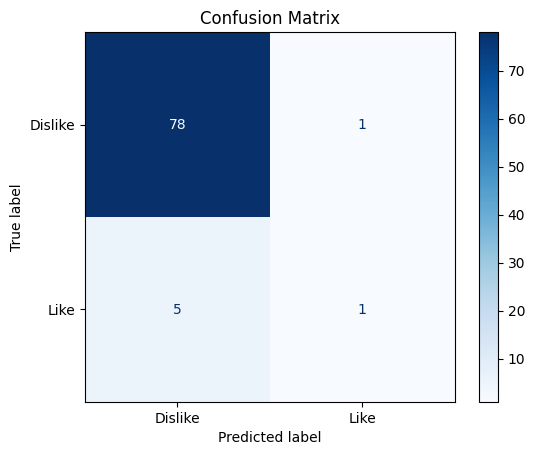

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
model.eval()  # Set the model to evaluation mode

# Lists to store predictions and ground truth
all_predictions = []
all_ground_truth = []

with torch.no_grad():  # No need to track gradients for evaluation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Move predictions and labels to CPU for sklearn metrics
        all_predictions.extend(predicted.cpu().numpy())
        all_ground_truth.extend(labels.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_ground_truth, all_predictions)
precision = precision_score(all_ground_truth, all_predictions, zero_division=0)
recall = recall_score(all_ground_truth, all_predictions, zero_division=0)
f1 = f1_score(all_ground_truth, all_predictions, zero_division=0)

# Print metrics
print(f"Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create and visualize confusion matrix
cm = confusion_matrix(all_ground_truth, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Dislike", "Like"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### 5.2.1 Understanding the Confusion Matrix

The confusion matrix shows us **where our model succeeds and fails**:

- **True Positives (Bottom-Right)** – Images you like that the model correctly classified as "Like"
- **True Negatives (Top-Left)** – Images you dislike that the model correctly classified as "Dislike"
- **False Positives (Top-Right)** – Images you dislike that the model incorrectly classified as "Like"
- **False Negatives (Bottom-Left)** – Images you like that the model incorrectly classified as "Dislike"


For most dating apps, they might prioritize **recall** over precision – showing you more options rather than missing potential matches.

### 5.2.2 Understanding the Confusion
Instead of just looking at the numbers, we can actually examine by eye where our model got wrong. Maybe it "reasonable" mistakes ?

Out of 85 profiles in the validation set:
- Your model would show you 2 profiles (2.4%)
- 1 of these you actually liked (50.0% precision)
- The model found 1 out of 6 profiles you actually liked (16.7% recall)

False Negatives:
- The model missed 5 profiles you actually liked
- These represent 83.3% of your total 'Like' preferences


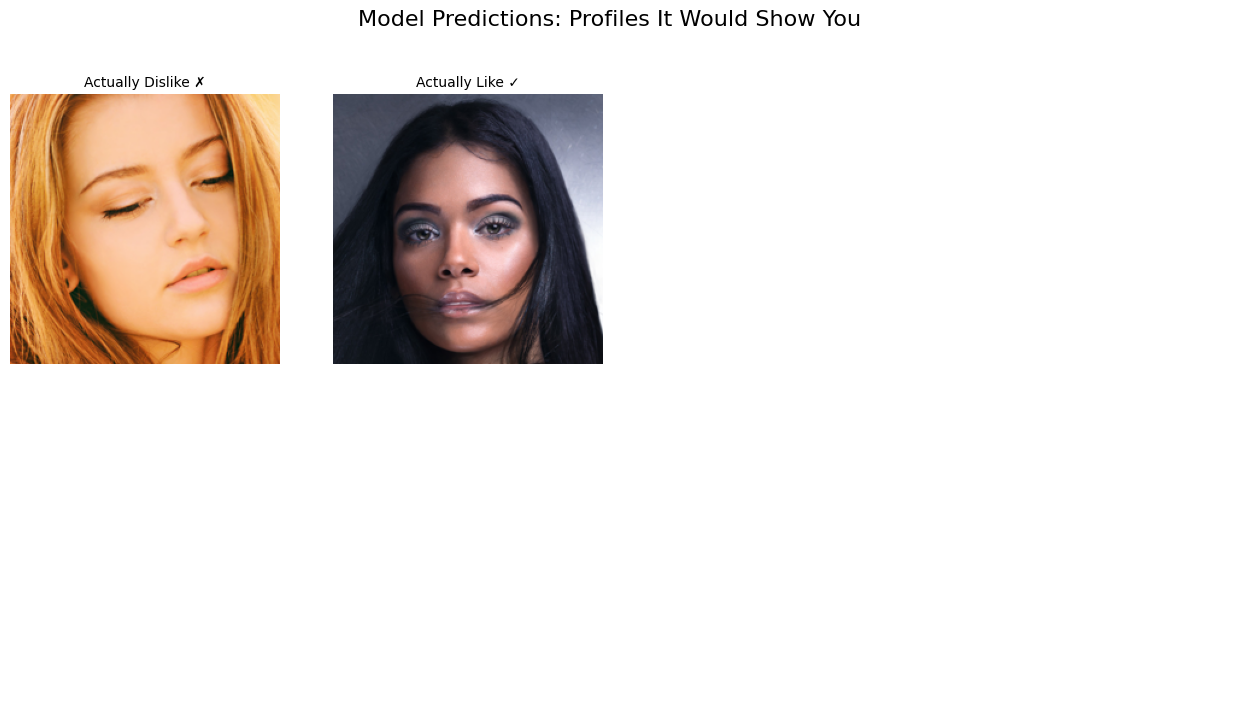

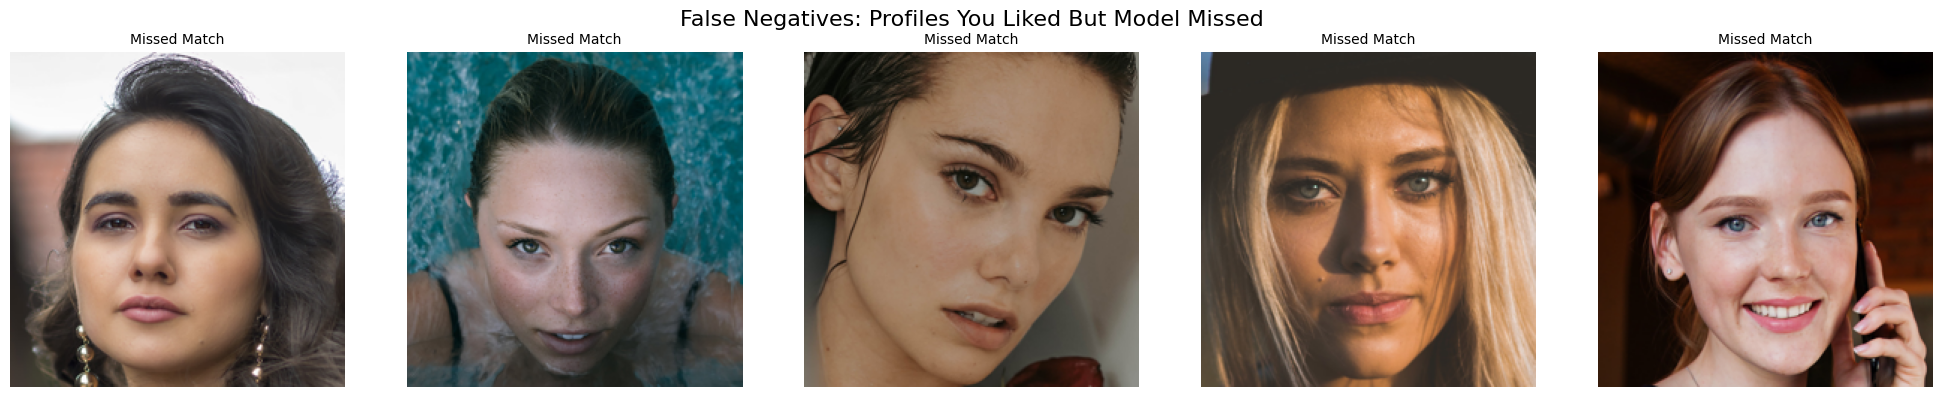

In [12]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from PIL import Image
import os
import numpy as np
import torch

# Load validation dataset with a transform that doesn't normalize (for display purposes)
display_transform = transforms.Compose([
  transforms.Resize((224, 224)),
  transforms.ToTensor(),
])

val_paths = []
val_labels = []
val_predictions = []

# Get file paths and model predictions
model.eval()
with torch.no_grad():
  for root, _, files in os.walk(val_dir):
      for file in sorted(files):
          if file.endswith(('.jpg', '.jpeg', '.png')):
              img_path = os.path.join(root, file)
              label = 1 if "Like" in img_path else 0  # 1 for Like, 0 for Dislike

              # Load and transform the image
              img = Image.open(img_path).convert('RGB')
              img_tensor = transform(img).unsqueeze(0).to(device)

              # Get prediction
              output = model(img_tensor)
              _, prediction = torch.max(output, 1)

              val_paths.append(img_path)
              val_labels.append(label)
              val_predictions.append(prediction.item())

# Find images the model predicts as "Like" (matches)
matches_indices = [i for i, pred in enumerate(val_predictions) if pred == 1]
matches_paths = [val_paths[i] for i in matches_indices]
matches_true_labels = [val_labels[i] for i in matches_indices]

# Find false negatives (you liked but model predicted dislike)
false_negatives_indices = [i for i, (label, pred) in enumerate(zip(val_labels, val_predictions))
                        if label == 1 and pred == 0]
false_negatives_paths = [val_paths[i] for i in false_negatives_indices]

# Count correct and incorrect "Like" predictions
true_positives = sum(1 for i in matches_indices if val_labels[i] == 1)
false_positives = sum(1 for i in matches_indices if val_labels[i] == 0)

# Display matches first (True predictions)
num_matches_to_display = min(8, len(matches_paths))
if num_matches_to_display > 0:
  fig, axes = plt.subplots(2, 4, figsize=(16, 8))
  axes = axes.flatten()

  for i in range(num_matches_to_display):
      img = Image.open(matches_paths[i]).convert('RGB')
      img = img.resize((224, 224))  # Resize for display
      actual_label = "Actually Like ✓" if matches_true_labels[i] == 1 else "Actually Dislike ✗"

      axes[i].imshow(np.array(img))
      axes[i].set_title(f"{actual_label}", fontsize=10)
      axes[i].axis('off')

  # Hide any unused subplots
  for i in range(num_matches_to_display, len(axes)):
      axes[i].axis('off')

  fig.suptitle("Model Predictions: Profiles It Would Show You", fontsize=16)

  # Print summary statistics
  print(f"Out of {len(val_paths)} profiles in the validation set:")
  print(f"- Your model would show you {len(matches_paths)} profiles ({len(matches_paths)/len(val_paths)*100:.1f}%)")
  print(f"- {true_positives} of these you actually liked ({true_positives/len(matches_paths)*100:.1f}% precision)")
  print(f"- The model found {true_positives} out of {sum(val_labels)} profiles you actually liked ({true_positives/sum(val_labels)*100:.1f}% recall)")
else:
  plt.figure(figsize=(5, 5))
  plt.text(0.5, 0.5, "No matches found!", ha='center', va='center', fontsize=14)
  plt.axis('off')
  plt.show()

# Now display False Negatives (profiles you liked but model missed)
num_false_neg_to_display = min(5, len(false_negatives_paths))
if num_false_neg_to_display > 0:
  fig, axes = plt.subplots(1, num_false_neg_to_display, figsize=(4*num_false_neg_to_display, 4))

  # Handle the case where we only have one false negative
  if num_false_neg_to_display == 1:
      axes = [axes]

  for i in range(num_false_neg_to_display):
      img = Image.open(false_negatives_paths[i]).convert('RGB')
      img = img.resize((224, 224))  # Resize for display

      axes[i].imshow(np.array(img))
      axes[i].set_title(f"Missed Match", fontsize=10)
      axes[i].axis('off')

  fig.suptitle("False Negatives: Profiles You Liked But Model Missed", fontsize=16)
  print(f"\nFalse Negatives:")
  print(f"- The model missed {len(false_negatives_paths)} profiles you actually liked")
  print(f"- These represent {len(false_negatives_paths)/sum(val_labels)*100:.1f}% of your total 'Like' preferences")
else:
  plt.figure(figsize=(5, 5))
  plt.text(0.5, 0.5, "No false negatives found!", ha='center', va='center', fontsize=14)
  plt.axis('off')

plt.tight_layout()
plt.show()

## 5.4.1 Possible fixes - Analyzing Model Confidence
In order to direct a model to better performance we should panelize/reward towards the desired outcome. this can be implemented in several ways:
1. Panelize the model more on specific type of mistakes *In training time*
2. Lower the tresholds in which the model decide on like. By default, the NN models assign the label that gets > 0.5 score. We can lower/higher the treshold according to our needs.
   
Let's examine how confident the model is about each "Like" prediction. This can help us understand which features most strongly influence the model's decisions:

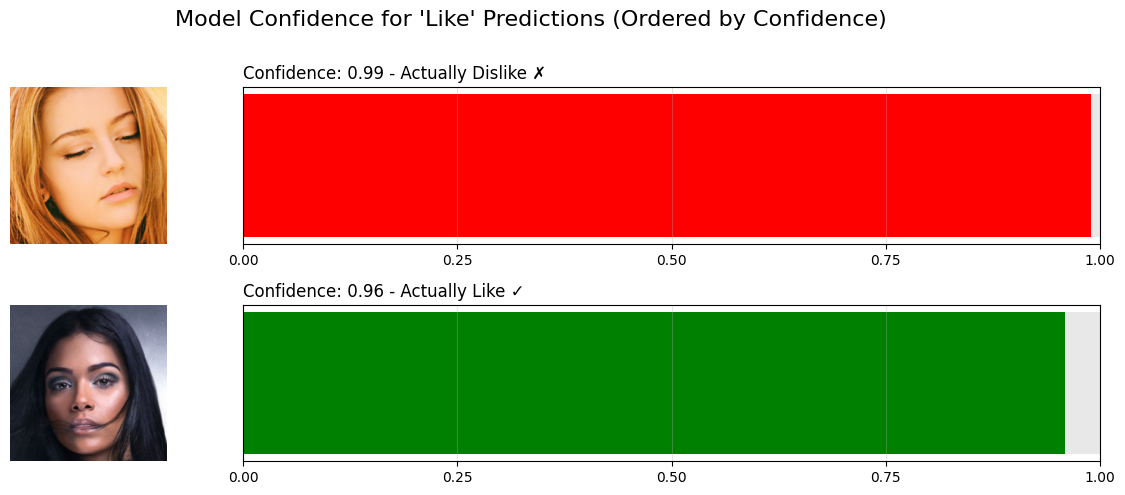

Analysis of model confidence for 'Like' predictions:
- Average confidence for true positives: 0.96
- Average confidence for false positives: 0.99

Observation:
The model is more confident about some incorrect predictions than correct ones - this suggests room for improvement.


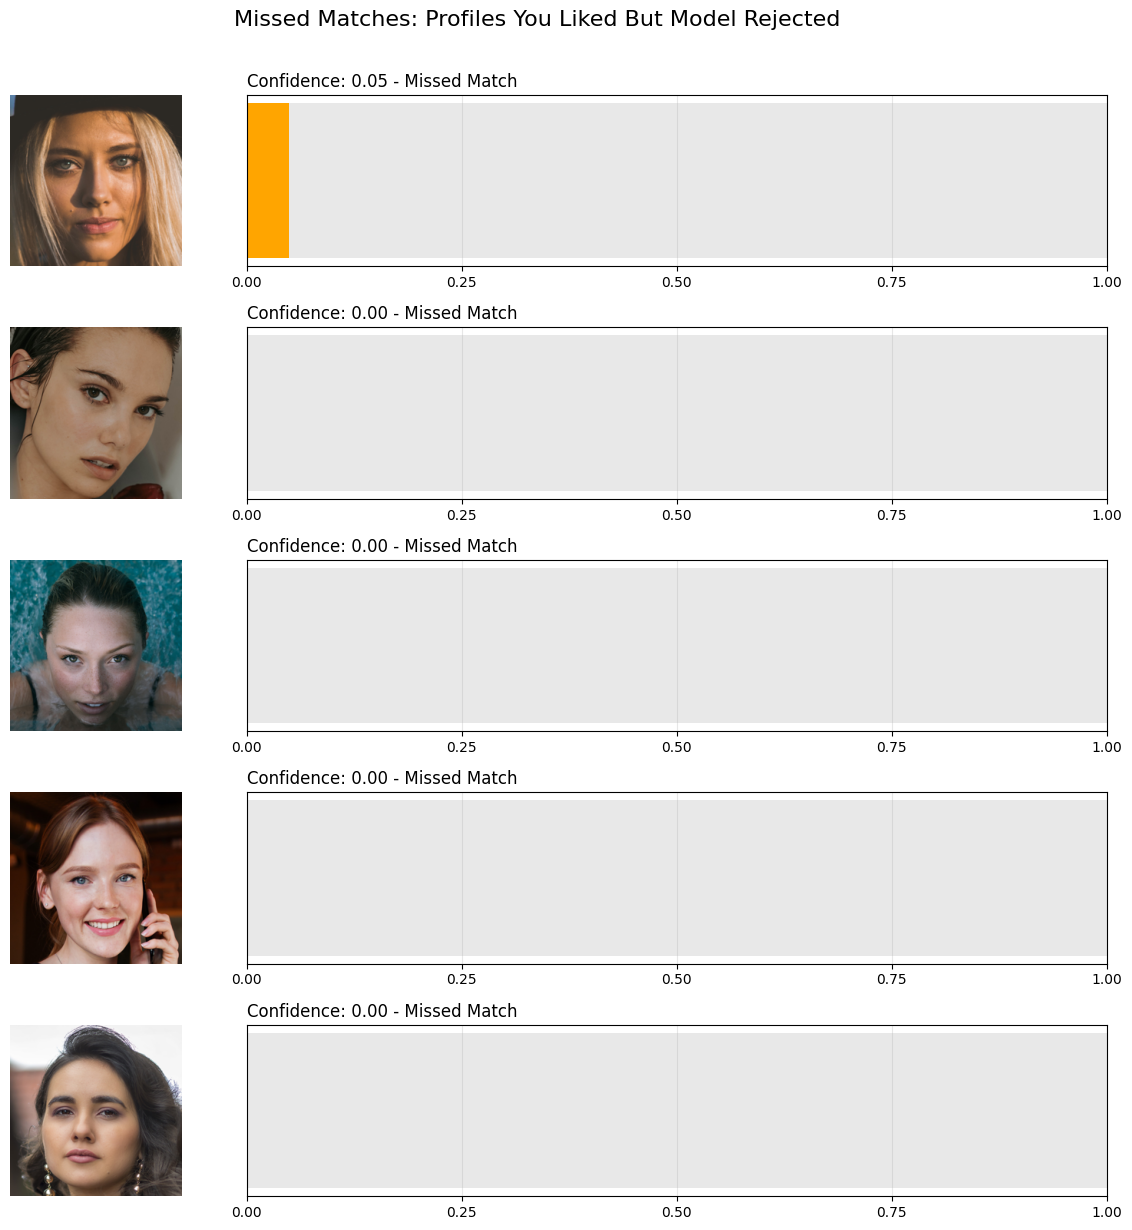


Analysis of missed matches (false negatives):
- Total missed matches: 5
- Average confidence for missed matches: 0.01
- Missed matches with confidence above 0.4: 0 (0.0%)


In [13]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch
import os

# Process all validation images and get confidence scores
val_images = []
val_confidences = []
val_predictions = []
val_actual_labels = []
val_paths = []

model.eval()
with torch.no_grad():
    for root, _, files in os.walk(val_dir):
        for file in sorted(files):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                label = 1 if "Like" in img_path else 0  # 1 for Like, 0 for Dislike
                
                # Load and transform the image
                img = Image.open(img_path).convert('RGB')
                img_tensor = transform(img).unsqueeze(0).to(device)
                
                # Get prediction with confidence
                output = model(img_tensor)
                probabilities = F.softmax(output, dim=1)
                confidence = probabilities[0][1].item()  # Confidence for "Like" class
                prediction = 1 if confidence > 0.5 else 0
                
                # Store all predictions
                val_images.append(img)
                val_confidences.append(confidence)
                val_predictions.append(prediction)
                val_actual_labels.append(label)
                val_paths.append(img_path)

# 1. First, handle "Like" predictions (same as original code)
like_indices = [i for i, pred in enumerate(val_predictions) if pred == 1]
like_images = [val_images[i] for i in like_indices]
like_confidences = [val_confidences[i] for i in like_indices]
like_labels = [val_actual_labels[i] for i in like_indices]

# Sort "Like" predictions by confidence
like_sorted_indices = np.argsort(like_confidences)[::-1]
like_sorted_images = [like_images[i] for i in like_sorted_indices]
like_sorted_confidences = [like_confidences[i] for i in like_sorted_indices]
like_sorted_labels = [like_labels[i] for i in like_sorted_indices]

# Display "Like" predictions
num_likes = len(like_sorted_images)
if num_likes > 0:
    # Set up figure for like predictions
    fig, axes = plt.subplots(num_likes, 2, figsize=(12, 2.5 * num_likes), 
                            gridspec_kw={'width_ratios': [1, 3]})
    
    # If only one image, axes won't be 2D, so make it 2D
    if num_likes == 1:
        axes = np.array([axes])
    
    # Plot each image and its confidence bar
    for i in range(num_likes):
        # Display the image
        img = like_sorted_images[i].resize((224, 224))
        axes[i, 0].imshow(np.array(img))
        axes[i, 0].axis('off')
        
        # Display confidence bar
        confidence = like_sorted_confidences[i]
        bar_colors = ['green' if like_sorted_labels[i] == 1 else 'red']
        actual_label = "Actually Like ✓" if like_sorted_labels[i] == 1 else "Actually Dislike ✗"
        
        axes[i, 1].barh([0], [confidence], color=bar_colors, height=0.5)
        axes[i, 1].barh([0], [1-confidence], left=[confidence], color='lightgray', height=0.5, alpha=0.5)
        axes[i, 1].set_xlim(0, 1.0)
        axes[i, 1].set_yticklabels([])
        axes[i, 1].set_yticks([])
        axes[i, 1].set_xticks([0, 0.25, 0.5, 0.75, 1.0])
        axes[i, 1].set_title(f"Confidence: {confidence:.2f} - {actual_label}", loc='left')
        axes[i, 1].grid(axis='x', alpha=0.3)
    
    plt.suptitle("Model Confidence for 'Like' Predictions (Ordered by Confidence)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for suptitle
    plt.show()
    
    # Print analysis of confidence for "Like" predictions
    true_positives = sum(1 for i in range(num_likes) if like_sorted_labels[i] == 1)
    false_positives = num_likes - true_positives
    
    print(f"Analysis of model confidence for 'Like' predictions:")
    print(f"- Average confidence for true positives: {sum(like_sorted_confidences[i] for i in range(num_likes) if like_sorted_labels[i] == 1) / max(1, true_positives):.2f}")
    print(f"- Average confidence for false positives: {sum(like_sorted_confidences[i] for i in range(num_likes) if like_sorted_labels[i] == 0) / max(1, false_positives):.2f}")
    
    if true_positives > 0 and false_positives > 0:
        print("\nObservation:")
        # Calculate averages separately to avoid line break issues
        tp_avg = sum(like_sorted_confidences[i] for i in range(num_likes) if like_sorted_labels[i] == 1) / true_positives
        fp_avg = sum(like_sorted_confidences[i] for i in range(num_likes) if like_sorted_labels[i] == 0) / false_positives
        
        if tp_avg > fp_avg:
            print("The model is more confident about its correct predictions than its incorrect ones - a good sign!")
        else:
            print("The model is more confident about some incorrect predictions than correct ones - this suggests room for improvement.")
else:
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, "No 'Like' predictions found", ha='center', va='center', fontsize=14)
    plt.axis('off')
    plt.show()

# 2. Now, handle false negatives (missed matches)
false_negative_indices = [i for i, (pred, label) in enumerate(zip(val_predictions, val_actual_labels)) 
                         if pred == 0 and label == 1]
false_neg_images = [val_images[i] for i in false_negative_indices]
false_neg_confidences = [val_confidences[i] for i in false_negative_indices]
false_neg_paths = [val_paths[i] for i in false_negative_indices]

# Sort false negatives by confidence (highest first)
false_neg_sorted_indices = np.argsort(false_neg_confidences)[::-1]
false_neg_sorted_images = [false_neg_images[i] for i in false_neg_sorted_indices]
false_neg_sorted_confidences = [false_neg_confidences[i] for i in false_neg_sorted_indices]

# Display false negatives
num_false_negs = len(false_neg_sorted_images)
if num_false_negs > 0:
    # Set up figure for false negatives
    fig, axes = plt.subplots(min(num_false_negs, 5), 2, figsize=(12, 2.5 * min(num_false_negs, 5)), 
                            gridspec_kw={'width_ratios': [1, 3]})
    
    # If only one image, axes won't be 2D, so make it 2D
    if min(num_false_negs, 5) == 1:
        axes = np.array([axes])
    
    # Plot each image and its confidence bar (up to 5)
    for i in range(min(num_false_negs, 5)):
        # Display the image
        img = false_neg_sorted_images[i].resize((224, 224))
        axes[i, 0].imshow(np.array(img))
        axes[i, 0].axis('off')
        
        # Display confidence bar
        confidence = false_neg_sorted_confidences[i]
        
        axes[i, 1].barh([0], [confidence], color='orange', height=0.5)
        axes[i, 1].barh([0], [1-confidence], left=[confidence], color='lightgray', height=0.5, alpha=0.5)
        axes[i, 1].set_xlim(0, 1.0)
        axes[i, 1].set_yticklabels([])
        axes[i, 1].set_yticks([])
        axes[i, 1].set_xticks([0, 0.25, 0.5, 0.75, 1.0])
        axes[i, 1].set_title(f"Confidence: {confidence:.2f} - Missed Match", loc='left')
        axes[i, 1].grid(axis='x', alpha=0.3)
    
    plt.suptitle("Missed Matches: Profiles You Liked But Model Rejected", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for suptitle
    plt.show()
    
    # Print analysis of confidence for false negatives
    print(f"\nAnalysis of missed matches (false negatives):")
    print(f"- Total missed matches: {num_false_negs}")
    print(f"- Average confidence for missed matches: {sum(false_neg_sorted_confidences) / num_false_negs:.2f}")
    
    # Find how close the false negatives were to the threshold
    near_threshold = sum(1 for conf in false_neg_sorted_confidences if conf >= 0.4)
    print(f"- Missed matches with confidence above 0.4: {near_threshold} ({near_threshold/num_false_negs*100:.1f}%)")
    
    # Insights about threshold adjustment
    if near_threshold > 0:
        print("\nInsight: Lowering your confidence threshold from 0.5 to 0.4 would capture")
        print(f"{near_threshold} additional profiles you liked, but might also increase false positives.")
else:
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, "No missed matches found!", ha='center', va='center', fontsize=14)
    plt.axis('off')
    plt.show()

In [14]:
# Interactive Threshold Adjustment
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np
from PIL import Image
import math

# Process all validation images with their confidence scores (reuse from previous cell)
all_confidences = val_confidences
all_labels = val_actual_labels
all_images = val_images  # These should be the PIL images

# Define function for adjusting threshold
def adjust_threshold(threshold=0.5):
    # Apply the threshold to make predictions
    adjusted_predictions = [1 if conf >= threshold else 0 for conf in all_confidences]
    
    # Calculate metrics
    true_positives = sum(1 for pred, label in zip(adjusted_predictions, all_labels) if pred == 1 and label == 1)
    false_positives = sum(1 for pred, label in zip(adjusted_predictions, all_labels) if pred == 1 and label == 0)
    false_negatives = sum(1 for pred, label in zip(adjusted_predictions, all_labels) if pred == 0 and label == 1)
    true_negatives = sum(1 for pred, label in zip(adjusted_predictions, all_labels) if pred == 0 and label == 0)
    
    # Count total predictions for "Like"
    total_like_predictions = sum(1 for pred in adjusted_predictions if pred == 1)
    
    # Calculate metrics (with safety for division by zero)
    precision = true_positives / max(1, total_like_predictions)
    recall = true_positives / max(1, true_positives + false_negatives)
    accuracy = (true_positives + true_negatives) / len(all_labels)
    f1 = 2 * (precision * recall) / max(0.001, precision + recall)  # Avoid division by zero
    
    # Create the plot for metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    # Plot 1: Confusion matrix as a heatmap
    cm = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])
    im = ax1.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax1.set_title(f'Confusion Matrix (Threshold = {threshold:.2f})')
    ax1.set_xticks([0, 1])
    ax1.set_yticks([0, 1])
    ax1.set_xticklabels(['Predicted Dislike', 'Predicted Like'])
    ax1.set_yticklabels(['Actual Dislike', 'Actual Like'])
    
    # Add text annotations to the confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    # Plot 2: Metrics bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]
    bars = ax2.bar(metrics, values)
    
    # Color the bars based on values
    for bar, value in zip(bars, values):
        if value < 0.33:
            bar.set_color('red')
        elif value < 0.66:
            bar.set_color('orange')
        else:
            bar.set_color('green')
    
    ax2.set_ylim(0, 1.0)
    ax2.set_title(f'Performance Metrics (Threshold = {threshold:.2f})')
    ax2.set_ylabel('Score')
    ax2.grid(axis='y', alpha=0.3)
    
    # Add text labels for the exact values
    for i, v in enumerate(values):
        ax2.text(i, v + 0.02, f'{v:.2f}', ha='center')
    
    # Display statistics as text
    plt.figtext(0.5, 0.01, 
                f"At threshold {threshold:.2f}:\n"
                f"• Would show you {total_like_predictions} out of {len(all_labels)} profiles ({total_like_predictions/len(all_labels)*100:.1f}%)\n"
                f"• {true_positives} of these you actually liked ({precision*100:.1f}% precision)\n"
                f"• The model found {true_positives} out of {true_positives + false_negatives} profiles you liked ({recall*100:.1f}% recall)",
                ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
    
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    plt.show()
    
    # Now display the profiles with the current threshold
    # 1. Get indices of profiles that would be shown (predicted as "Like")
    matched_indices = [i for i, pred in enumerate(adjusted_predictions) if pred == 1]
    
    if len(matched_indices) > 0:
        # Calculate grid size
        max_images = min(8, len(matched_indices))  # Cap at 8 images
        cols = min(4, max_images)
        rows = math.ceil(max_images / cols)
        
        # Create the figure for showing matches
        fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
        
        # Make sure axes is 2D even if there's only one row or column
        if rows == 1 and cols == 1:
            axes = np.array([[axes]])
        elif rows == 1:
            axes = np.array([axes])
        elif cols == 1:
            axes = np.array([[ax] for ax in axes])
        
        # Flatten the axes for easier indexing
        axes = axes.flatten()
        
        # Display each matched profile
        for i in range(max_images):
            idx = matched_indices[i]
            img = all_images[idx].resize((224, 224))
            actual_label = "Actually Like ✓" if all_labels[idx] == 1 else "Actually Dislike ✗"
            confidence_val = all_confidences[idx]
            
            axes[i].imshow(np.array(img))
            axes[i].set_title(f"{confidence_val:.2f} - {actual_label}", fontsize=10)
            axes[i].axis('off')
        
        # Hide any unused subplots
        for i in range(max_images, len(axes)):
            axes[i].axis('off')
        
        plt.suptitle(f"Profiles Your Model Would Show (Threshold = {threshold:.2f})", fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Make room for suptitle
        plt.show()
    else:
        plt.figure(figsize=(8, 4))
        plt.text(0.5, 0.5, f"No profiles would be shown at threshold {threshold:.2f}!", 
                 ha='center', va='center', fontsize=14)
        plt.axis('off')
        plt.show()

# Create interactive widget with slider
interact(adjust_threshold, 
         threshold=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, 
                             description='Threshold:',
                             style={'description_width': 'initial'},
                             layout={'width': '500px'}));

interactive(children=(FloatSlider(value=0.5, description='Threshold:', layout=Layout(width='500px'), max=1.0, …

## 5.3 Final Evaluation on Test Set

Now it's time for the final evaluation on our **test set** – data the model has never seen before. This gives us the most realistic measure of how well our model will perform in the real world.

In [23]:
## Set the threshold according to your validation and precision-recall preferences
threshold = 0.1

Out of 86 profiles in the test set:
- Your model would show you 2 profiles (2.3%)
- 0 of these you actually liked (0.0% precision)
- The model found 0 out of 6 profiles you actually liked (0.0% recall)


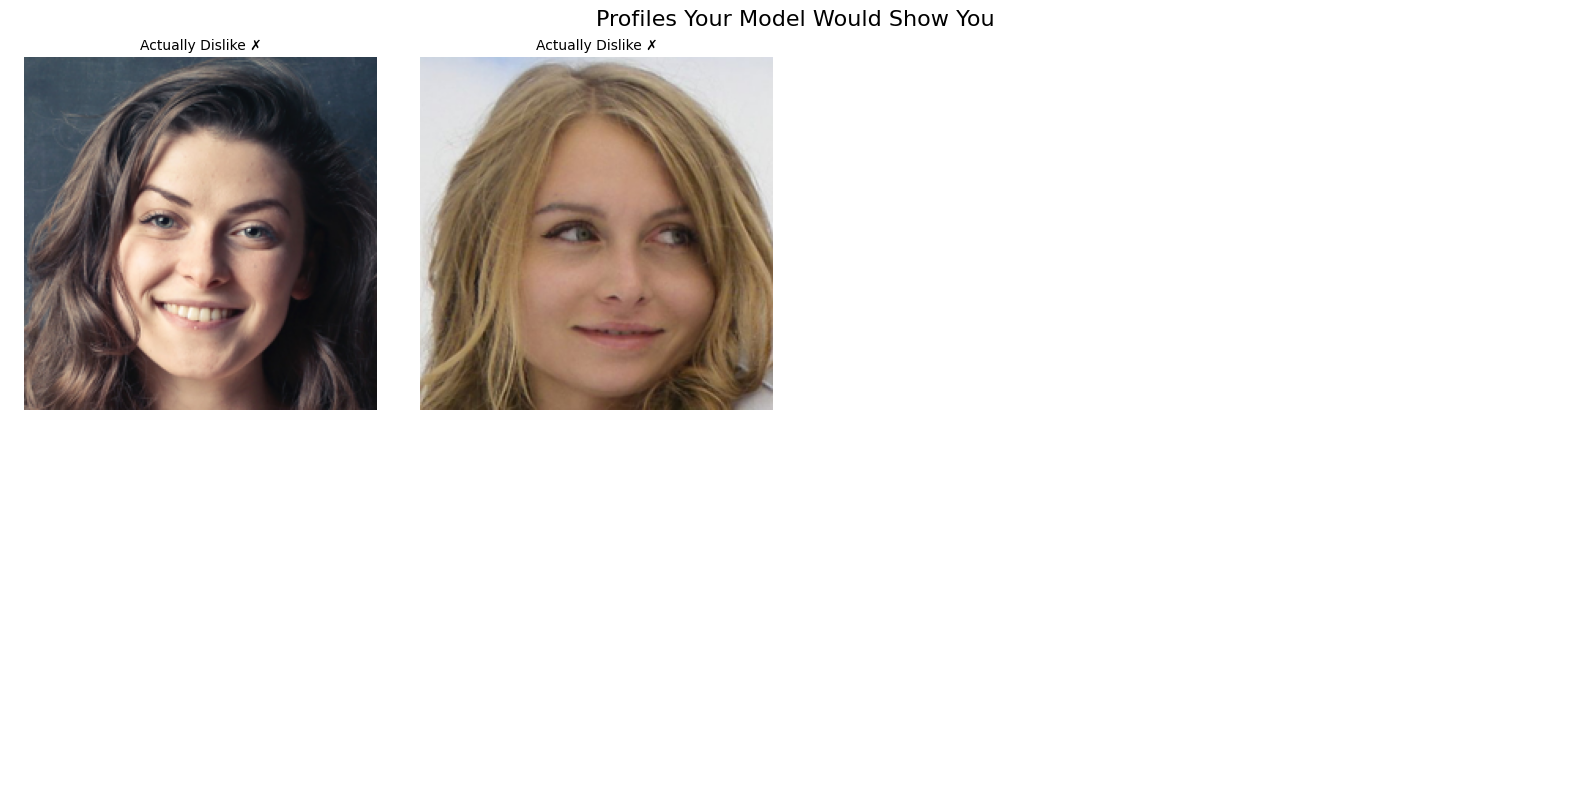

In [24]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from PIL import Image
import os
import numpy as np
import torch


# Load test dataset with a transform that doesn't normalize (for display purposes)
display_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

test_paths = []
test_labels = []
actual_predictions = []

# Get file paths and model predictions
model.eval()
with torch.no_grad():
    for root, _, files in os.walk(test_dir):
        for file in sorted(files):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                label = 1 if "Like" in img_path else 0  # 1 for Like, 0 for Dislike
                
                # Load and transform the image
                img = Image.open(img_path).convert('RGB')
                img_tensor = transform(img).unsqueeze(0).to(device)
                
                # Get prediction
                output = model(img_tensor)
                # Apply softmax to get probabilities
                probs = torch.softmax(output, dim=1)

                # Apply threshold manually on class 1
                prediction = (probs[0, 1] > threshold).int()
                # _, prediction = torch.max(output, 1)
                
                test_paths.append(img_path)
                test_labels.append(label)
                actual_predictions.append(prediction.item())

# Find images the model predicts as "Like"
matches_indices = [i for i, pred in enumerate(actual_predictions) if pred == 1]
matches_paths = [test_paths[i] for i in matches_indices]
matches_true_labels = [test_labels[i] for i in matches_indices]

# Count correct and incorrect "Like" predictions
true_positives = sum(1 for i in matches_indices if test_labels[i] == 1)
false_positives = sum(1 for i in matches_indices if test_labels[i] == 0)

# Display some of the matches (up to 8)
num_to_display = min(8, len(matches_paths))
fig, axes = plt.subplots(2, 4, figsize=(16, 8)) if num_to_display > 0 else plt.subplots(1, 1, figsize=(5, 5))

if num_to_display > 0:
    axes = axes.flatten()
    for i in range(num_to_display):
        img = Image.open(matches_paths[i]).convert('RGB')
        img = img.resize((224, 224))  # Resize for display
        actual_label = "Actually Like ✓" if matches_true_labels[i] == 1 else "Actually Dislike ✗"
        
        axes[i].imshow(np.array(img))
        axes[i].set_title(f"{actual_label}", fontsize=10)
        axes[i].axis('off')
    
    # Hide any unused subplots
    for i in range(num_to_display, len(axes)):
        axes[i].axis('off')
        
    fig.suptitle("Profiles Your Model Would Show You", fontsize=16)
    
    # Print summary statistics
    print(f"Out of {len(test_paths)} profiles in the test set:")
    print(f"- Your model would show you {len(matches_paths)} profiles ({len(matches_paths)/len(test_paths)*100:.1f}%)")
    print(f"- {true_positives} of these you actually liked ({true_positives/len(matches_paths)*100:.1f}% precision)")
    print(f"- The model found {true_positives} out of {sum(test_labels)} profiles you actually liked ({true_positives/sum(test_labels)*100:.1f}% recall)")
else:
    plt.text(0.5, 0.5, "No matches found!", ha='center', va='center', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5.5 Conclusion and Next Steps

Congratulations! You've successfully built a personalized photo preference model. This model actually learns what *you* find attractive, rather than following some pre-defined standard.

### What We've Accomplished:
1. Created a labeled dataset based on your preferences
2. Prepared the data for machine learning
3. Trained a convolutional neural network to recognize your preferences
4. Evaluated the model's performance with multiple metrics
5. Simulated how this model would work in a real-world application

### 🚀 Taking It Further:

If you want to keep building from here, there are **four great directions** you can explore:

---

#### 🎥 1. Better Intuition on Nueral Netwoks
Get a visual feel for what neural networks do and how they learn.

- [**What is a neural network?** – 3Blue1Brown (YouTube)](https://www.youtube.com/watch?v=aircAruvnKk)  
  One of the best short, intuitive explanations out there.

---

#### 📚 2. Theory Deep Dive
Deepen your understanding of the math, ideas, and guarantees behind ML.

**Videos & Courses:**
- [**Learning From Data (Caltech)** – Full video course + slides](https://work.caltech.edu/telecourse.html)  
- [**Andrew Ng’s Coursera courses**](https://www.coursera.org/specializations/machine-learning-introduction)

**Books:**
- *Understanding Machine Learning* – Shai Shalev-Shwartz & Shai Ben-David  
- [*Foundations of Machine Learning* – Mohri, Rostamizadeh & Talwalkar](https://cs.nyu.edu/~mohri/mlbook/)

---

#### 🧪 3. Get Practical  
Try working with structured datasets where evaluation is clearer.

Here are two **beginner-friendly Kaggle challenges**:

- [**Titanic – Machine Learning from Disaster**](https://www.kaggle.com/competitions/titanic)  
  Predict survival on the Titanic — great for learning preprocessing, training, and evaluation.

- [**Dogs vs. Cats**](https://www.kaggle.com/competitions/dogs-vs-cats)  
  Classic binary image classification using CNNs. Our current session will be a very solid start for this problem.

---

#### 🔁 4. Refine *This* Project  

If you wanted to improve this model, you could:

1. **Collect More Data**: The more examples your model sees, the better it can learn your preferences
2. **Fine-Tune Hyperparameters**: Adjust learning rate, batch size, loss weithgs, different splits and even other model architecture
3. **Use Data Augmentation**: Create variations of your training images to improve generalization
4. **Apply Regularization**: Add techniques like dropout to prevent overfitting


### Real-World Applications:

The techniques you've learned here extend far beyond dating preferences:
- Content recommendation systems
- Medical image classification
- Quality control in manufacturing
- Security applications
- And many more!

The core principles remain the same: collect quality data, choose an appropriate model, train carefully, and evaluate thoroughly.

# Appendix

## How Neural Network Training Works

Training a neural network involves a continuous cycle of three key steps, as shown in the diagram above:

### 1️⃣ Forward Pass
- Input data (images in our case) travels through the network from left to right
- At each neuron, inputs are weighted, summed, and passed through an activation function
- The output layer produces predictions (ŷ) - in our case, scores for "Like" and "Dislike"

### 2️⃣ Compute Loss
- We compare our predictions (ŷ) with the true labels (y) using our loss function
- For example, with cross-entropy loss: $L = -y·log(ŷ) - (1-y)·log(1-ŷ)$
- The loss measures how wrong our predictions are

### 3️⃣ Backward Pass (Backpropagation)
- We calculate gradients for each weight by asking: "How much did this weight contribute to the error?"
- These gradients flow backward through the network (red arrows)
- Each weight is updated using gradient descent: $w := w - η·∂L/∂w$
- Amazingly, this can be calculated efficiently by applying the chain rule of calculus

This process repeats for many batches of examples. With each iteration, the weights are gradually adjusted to reduce the loss, improving the model's predictions.

In our Tinder model, we're adjusting millions of parameters this way - and after just 5 epochs, the model learns to make predictions that align with your personal preferences!

## Understanding Our Model: What is a Neural Network?

We are finally about to use our model, so let's understand what the model is. We should never use a model we don't understand (unless we want to be called "black boxers").

### Neural Networks - The Building Blocks

A neural network is a computational model inspired by the human brain. At its core, it consists of:

1. **Neurons** - These are the basic computational units that:
   - Receive inputs from other neurons
   - Apply weights to those inputs
   - Sum them up (plus a bias term)
   - Apply an activation function to produce an output

2. **Layers** - Neurons are organized in layers:
   - **Input Layer** - Receives initial data (in our case, image pixels)
   - **Hidden Layers** - Intermediate processing layers (the "thinking" parts)
   - **Output Layer** - Produces final predictions (for us, "Like" or "Dislike")

3. **Connections** - The weights between neurons that get adjusted during training

```
       Input Layer        Hidden Layers       Output Layer
       
          O                   O                   
          O                   O                   
          O       →           O       →          O  (Like)
          O                   O                  O  (Dislike)
          O                   O                   
         ...                 ...                  
```

### How Binary Classification Works

When we use a neural network for binary classification (Like/Dislike):

1. We feed an image through the network, and it produces two scores (one for "Like" and one for "Dislike").
2. These scores represent the network's confidence in each class.
3. We apply a softmax function to convert these scores into probabilities (that sum to 1).
4. The class with the highest probability is chosen as the prediction.

### Convolutional Neural Networks (CNNs)

For image data, we're using a specific type of neural network called a **Convolutional Neural Network (CNN)**:

- CNNs use special layers called **convolutional layers** that scan across the image, learning to detect patterns like edges, textures, and eventually more complex features
- They're specifically designed to handle the spatial structure in images
- They require much fewer parameters than traditional neural networks for the same task
- We're using a pre-trained model (MobileNetV2) that already knows how to recognize common patterns in images

*(Note: We won't dive deeply into CNN architecture specifics in this workshop, but it's good to know the general concept.)*

## Visual Understanding of Gradient Descent

Gradient descent is like **hiking down a mountain to find the lowest point**. Let's break it down visually:

### 1. The Mountain (Loss Landscape)

Imagine your model's parameters as coordinates on a mountain, where:
- **Height** = Loss (error) value
- **Location** = Parameter values
- **Lowest point** = Best parameter values

### 2. How We Navigate

1. **Check the slope** (compute gradient) where you're standing
2. **Take a step downhill** (in the opposite direction of the gradient)
3. **Repeat** until you reach the bottom (or close enough)

### 3. The Learning Rate

The learning rate (η) determines **how big your steps are**:
- **Too small**: Takes forever to reach the bottom (slow convergence)
- **Too large**: Might overshoot and miss the minimum (or diverge completely)
- **Just right**: Efficient progress toward the minimum

### 4. In Neural Networks

In a neural network:
- We're navigating a mountain with **millions of dimensions** (one for each parameter)
- We compute the gradient using **backpropagation** (math trick for efficiency)
- We adjust **all parameters simultaneously** after seeing batches of examples

The code in the next cell will create interactive visualizations to help build your intuition about how gradient descent works in both 1D and 2D parameter spaces.

1D Gradient Descent Visualization:


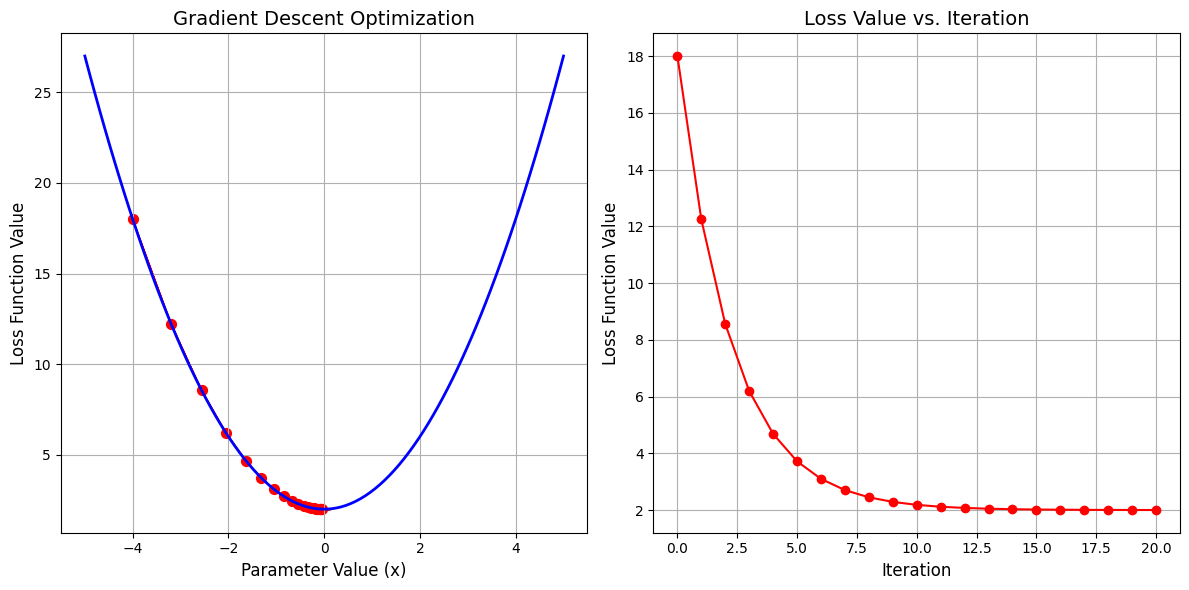


2D Gradient Descent Visualization:


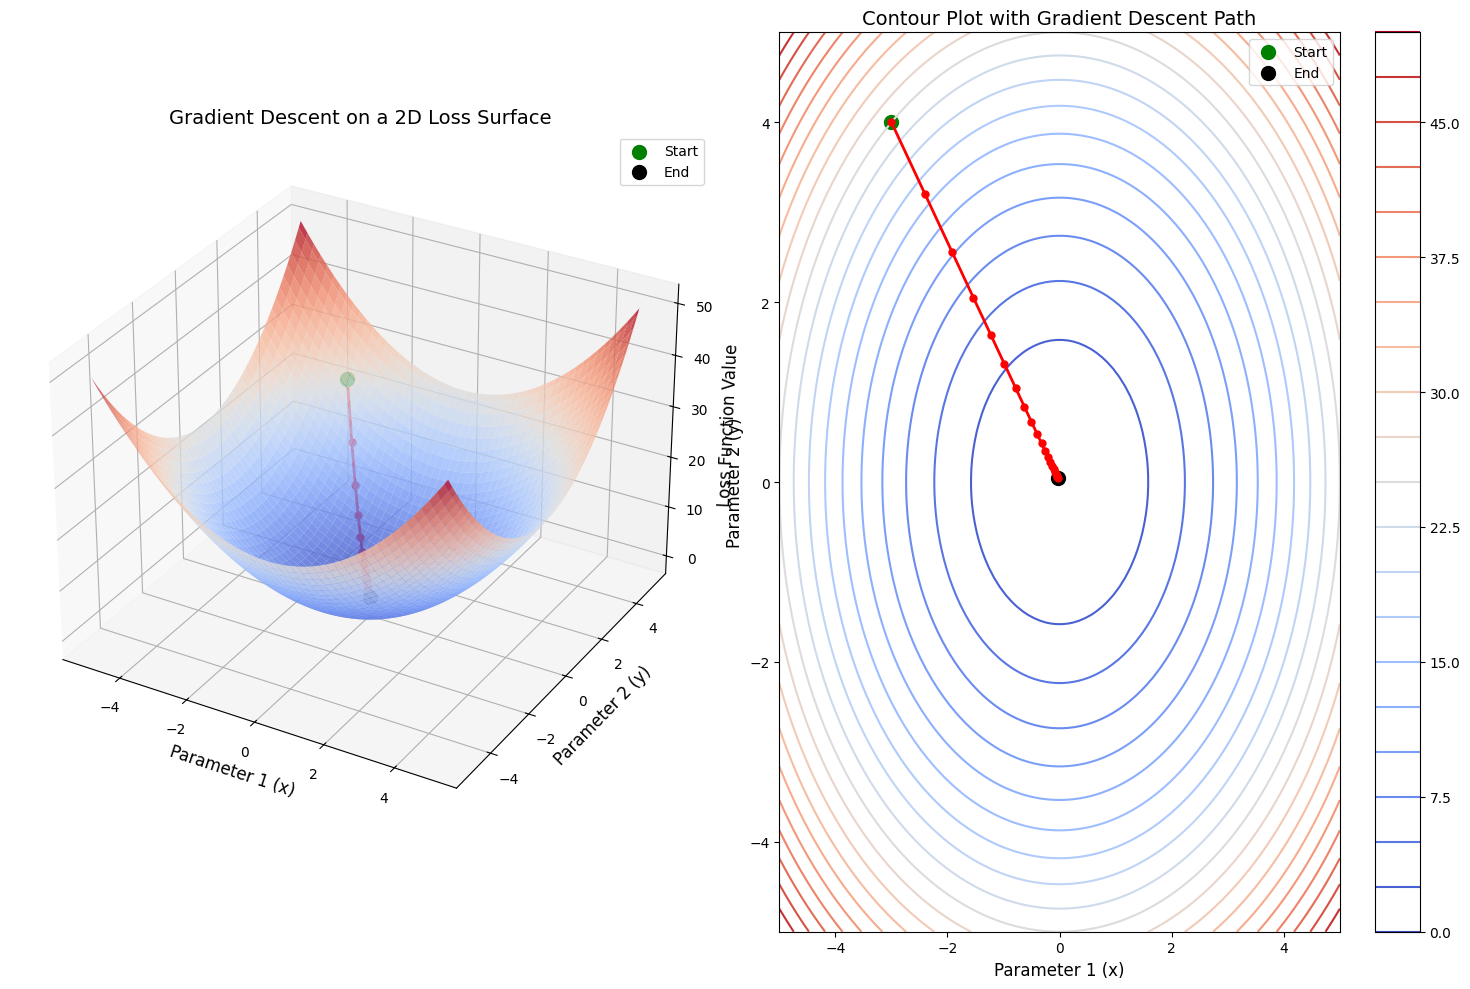


Key Points About Gradient Descent:
1. Gradient descent is like walking down a hill, always taking steps in the steepest direction
2. The learning rate controls how big each step is
3. With each step, we get closer to the minimum of the loss function
4. In neural networks, we're optimizing thousands or millions of parameters simultaneously


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a simple 2D visualization of gradient descent
def plot_gradient_descent_2d():
    # Define a simple loss function: f(x) = x^2 + 2
    def loss_function(x):
        return x**2 + 2
    
    # Compute the gradient: df/dx = 2x
    def gradient(x):
        return 2*x
    
    # Initialize parameters
    x_start = -4.0  # Starting point
    learning_rate = 0.1  # Step size
    num_iterations = 20
    
    # Gradient descent
    x_history = [x_start]
    loss_history = [loss_function(x_start)]
    
    x = x_start
    for i in range(num_iterations):
        grad = gradient(x)
        x = x - learning_rate * grad
        x_history.append(x)
        loss_history.append(loss_function(x))
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Loss function
    x_range = np.linspace(-5, 5, 100)
    y_range = [loss_function(xi) for xi in x_range]
    
    plt.subplot(1, 2, 1)
    plt.plot(x_range, y_range, 'b-', linewidth=2)
    plt.scatter(x_history, loss_history, c='red', s=50)
    
    # Connect the dots to show the path
    for i in range(len(x_history)-1):
        plt.arrow(x_history[i], loss_history[i], 
                 x_history[i+1]-x_history[i], loss_history[i+1]-loss_history[i],
                 head_width=0.1, head_length=0.2, fc='red', ec='red')
    
    plt.grid(True)
    plt.xlabel('Parameter Value (x)', fontsize=12)
    plt.ylabel('Loss Function Value', fontsize=12)
    plt.title('Gradient Descent Optimization', fontsize=14)
    
    # Plot 2: Loss vs Iteration
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss_history)), loss_history, 'ro-')
    plt.grid(True)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Loss Function Value', fontsize=12)
    plt.title('Loss Value vs. Iteration', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return x_history, loss_history

# Create a 3D surface plot to illustrate gradient descent in 2 dimensions
def plot_gradient_descent_3d():
    # Define a simple 2D loss function: f(x,y) = x^2 + y^2
    def loss_function(x, y):
        return x**2 + y**2
    
    # Compute the gradient: ∇f = [2x, 2y]
    def gradient(x, y):
        return np.array([2*x, 2*y])
    
    # Initialize parameters
    start_point = np.array([-3.0, 4.0])  # Starting point (x,y)
    learning_rate = 0.1  # Step size
    num_iterations = 20
    
    # Gradient descent
    path = [start_point]
    loss_history = [loss_function(start_point[0], start_point[1])]
    
    current_point = start_point.copy()
    for i in range(num_iterations):
        grad = gradient(current_point[0], current_point[1])
        current_point = current_point - learning_rate * grad
        path.append(current_point.copy())
        loss_history.append(loss_function(current_point[0], current_point[1]))
    
    # Create a meshgrid for the surface plot
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = loss_function(X, Y)
    
    # Converting path to numpy arrays for easier indexing
    path = np.array(path)
    
    # Create the 3D plot
    fig = plt.figure(figsize=(15, 10))
    
    # 3D Surface plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    surface = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)
    
    # Plot the path on the surface
    z_path = [loss_function(p[0], p[1]) for p in path]
    ax1.plot(path[:, 0], path[:, 1], z_path, 'r.-', markersize=10, linewidth=2)
    
    # Highlight start and end
    ax1.scatter(path[0, 0], path[0, 1], z_path[0], c='green', s=100, label='Start')
    ax1.scatter(path[-1, 0], path[-1, 1], z_path[-1], c='black', s=100, label='End')
    
    ax1.set_xlabel('Parameter 1 (x)', fontsize=12)
    ax1.set_ylabel('Parameter 2 (y)', fontsize=12)
    ax1.set_zlabel('Loss Function Value', fontsize=12)
    ax1.set_title('Gradient Descent on a 2D Loss Surface', fontsize=14)
    ax1.legend()
    
    # Contour plot (top view)
    ax2 = fig.add_subplot(1, 2, 2)
    contour = ax2.contour(X, Y, Z, 20, cmap=cm.coolwarm)
    fig.colorbar(contour, ax=ax2)
    
    # Plot the path on the contour
    ax2.plot(path[:, 0], path[:, 1], 'r.-', markersize=10, linewidth=2)
    
    # Highlight start and end
    ax2.scatter(path[0, 0], path[0, 1], c='green', s=100, label='Start')
    ax2.scatter(path[-1, 0], path[-1, 1], c='black', s=100, label='End')
    
    ax2.set_xlabel('Parameter 1 (x)', fontsize=12)
    ax2.set_ylabel('Parameter 2 (y)', fontsize=12)
    ax2.set_title('Contour Plot with Gradient Descent Path', fontsize=14)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Run the visualizations
print("1D Gradient Descent Visualization:")
x_history, loss_history = plot_gradient_descent_2d()

print("\n2D Gradient Descent Visualization:")
plot_gradient_descent_3d()

print("\nKey Points About Gradient Descent:")
print("1. Gradient descent is like walking down a hill, always taking steps in the steepest direction")
print("2. The learning rate controls how big each step is")
print("3. With each step, we get closer to the minimum of the loss function")
print("4. In neural networks, we're optimizing thousands or millions of parameters simultaneously")

## What Are We Actually Optimizing?

When we talk about gradient descent, it's important to understand **what function** we're trying to minimize. Let's clarify:

### The Loss Function: Measuring Prediction Error

In supervised learning, our goal is to make our model's predictions match the true labels:

$$\text{Loss} = \text{Error between prediction and truth} = L(f(x), y)$$

Where:
- $f(x)$ is our model's prediction for input $x$
- $y$ is the ground truth label
- $L$ is a function that measures how wrong our prediction is

For example, in binary classification (like our Tinder model), we use cross-entropy loss:

$$L = -y \log(f(x)) - (1-y) \log(1-f(x))$$

### Why We Only Tune f(x)

An important insight: **we can only adjust our model's predictions** $f(x)$, not the ground truth $y$. This is because:

1. The ground truth $y$ is fixed - these are the actual labels in our dataset
2. Our model $f(x)$ is what we're trying to learn - it contains all the parameters (weights and biases)
3. We want $f(x)$ to get as close as possible to $y$ for all examples in our dataset

### How Gradient Descent Fits In

If we simplify our loss to $L(x) = f(x) - y$, something important becomes clear. When we calculate the gradient:

$$\frac{\partial L}{\partial \theta} = \frac{\partial (f(x) - y)}{\partial \theta} = \frac{\partial f(x)}{\partial \theta} - \frac{\partial y}{\partial \theta}$$

Since $y$ is our ground truth label and doesn't depend on the model parameters $\theta$, we have:

$$\frac{\partial y}{\partial \theta} = 0$$

So the gradient simplifies to:

$$\frac{\partial L}{\partial \theta} = \frac{\partial f(x)}{\partial \theta}$$

This means **gradient descent only affects $f(x)$** - our model's predictions - as it should!

For each parameter $\theta$ in our model:
1. Calculate how changing $\theta$ affects the model prediction: $\frac{\partial f(x)}{\partial \theta}$
2. Move $\theta$ in the direction that makes the prediction closer to $y$: $\theta := \theta - \eta \cdot \frac{\partial L}{\partial \theta}$

The beauty of this approach is that **we don't need to know the exact formula for $f$** in advance. We just need a model flexible enough to learn the pattern, and gradient descent finds the parameters that make the model work.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch, Circle

# Create a high-level visualization of the backpropagation process
plt.figure(figsize=(12, 6))

# Define network structure
input_nodes = 3
hidden_nodes = 4
output_nodes = 2

# Node positions
x_positions = [1, 3, 5]  # Input, hidden, output layers
y_input = np.linspace(1, 4, input_nodes)
y_hidden = np.linspace(1, 4, hidden_nodes)
y_output = np.linspace(2, 3, output_nodes)

# Draw nodes
node_size = 0.3
for y in y_input:
    circle = plt.Circle((x_positions[0], y), node_size, color='lightblue', zorder=3)
    plt.gca().add_patch(circle)
    
for y in y_hidden:
    circle = plt.Circle((x_positions[1], y), node_size, color='lightgreen', zorder=3)
    plt.gca().add_patch(circle)
    
for y in y_output:
    circle = plt.Circle((x_positions[2], y), node_size, color='lightcoral', zorder=3)
    plt.gca().add_patch(circle)

# Draw connections for forward pass
for i, y1 in enumerate(y_input):
    for j, y2 in enumerate(y_hidden):
        arrow = FancyArrowPatch((x_positions[0]+node_size, y1), 
                                (x_positions[1]-node_size, y2),
                                color='blue', alpha=0.5, 
                                arrowstyle='->', linewidth=1.5,
                                mutation_scale=15, zorder=1)
        plt.gca().add_patch(arrow)
        
for i, y1 in enumerate(y_hidden):
    for j, y2 in enumerate(y_output):
        arrow = FancyArrowPatch((x_positions[1]+node_size, y1), 
                                (x_positions[2]-node_size, y2),
                                color='blue', alpha=0.5, 
                                arrowstyle='->', linewidth=1.5,
                                mutation_scale=15, zorder=1)
        plt.gca().add_patch(arrow)


# Add labels
plt.text(x_positions[0], 5, "Input Layer", ha='center', fontsize=12, fontweight='bold')
plt.text(x_positions[1], 5, "Hidden Layer", ha='center', fontsize=12, fontweight='bold')
plt.text(x_positions[2], 5, "Output Layer", ha='center', fontsize=12, fontweight='bold')

plt.text(x_positions[0] - 0.5, y_input[0], "x₁", fontsize=10, ha='right')
plt.text(x_positions[0] - 0.5, y_input[1], "x₂", fontsize=10, ha='right')
plt.text(x_positions[0] - 0.5, y_input[2], "x₃", fontsize=10, ha='right')

plt.text(x_positions[2] + 0.5, y_output[0], "ŷ₁", fontsize=10, ha='left')
plt.text(x_positions[2] + 0.5, y_output[1], "ŷ₂", fontsize=10, ha='left')

# Add arrows showing the process flow
plt.annotate("Forward Pass", xy=(2, 0.5), xytext=(2, 0.2), fontsize=12, fontweight='bold',
             color='blue', ha='center', arrowprops=dict(arrowstyle='->', color='blue'))
# plt.annotate("Backward Pass", xy=(4, 0.5), xytext=(4, 0.2), fontsize=12, fontweight='bold',
             color='red', ha='center', arrowprops=dict(arrowstyle='->', color='red'))

# Add loss calculation
loss_box = Rectangle((4.7, 3.5), 1.0, 0.6, fill=True, color='lightyellow', alpha=0.8)
plt.gca().add_patch(loss_box)
plt.text(5.2, 3.8, "Loss\nL(ŷ,y)", ha='center', fontsize=10)

# Label the phases
plt.text(2, 6, "1. Forward Pass: Calculate Predictions", fontsize=14, fontweight='bold', ha='center')
plt.text(4, 6.5, "2. Compute Loss: Compare Predictions to Truth", fontsize=14, fontweight='bold', ha='center')
plt.text(3, 7, "3. Backward Pass: Update Weights Using Gradients", fontsize=14, fontweight='bold', ha='center')

# Set limits and remove axes
plt.xlim(0, 6)
plt.ylim(0, 7.5)
plt.axis('off')

plt.title("Neural Network Training: Forward and Backward Passes", fontsize=16, pad=20)
plt.tight_layout()
plt.show()